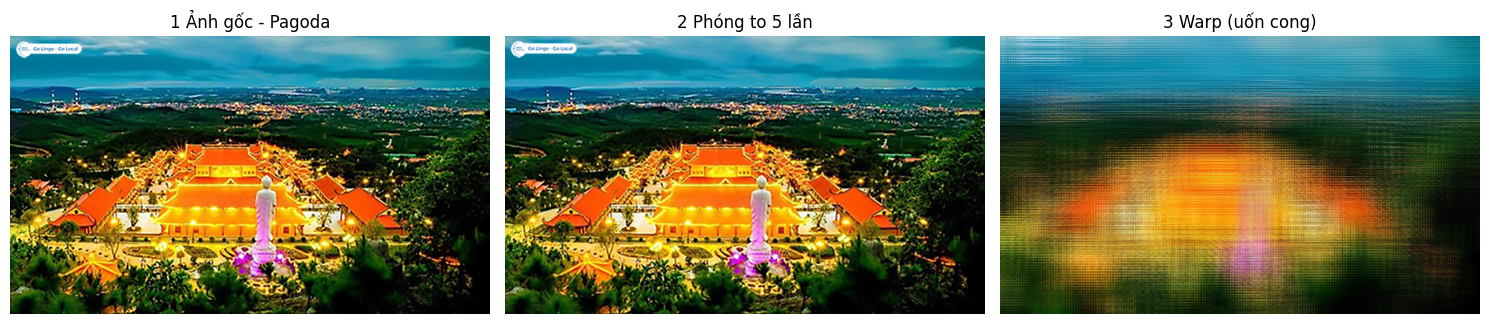

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates, zoom

# Đọc ảnh ngôi chùa
pagoda = iio.imread("exercise/pagoda.jpg")

# Bước 1: Phóng to 5 lần
pagoda_zoomed = zoom(pagoda, (5, 5, 1), order=3)  # phóng 5x cả chiều cao, rộng

# Bước 2: Biến đổi uốn cong (warp)
def warp_image(img, amplitude=80, frequency=0.1):
    H, W = img.shape[:2]
    M = np.indices((H, W))
    dx = amplitude * np.sin(2 * np.pi * M[0] * frequency)  # uốn cong theo hàng
    dy = amplitude * np.cos(2 * np.pi * M[1] * frequency)  # uốn cong theo cột
    coords = M + np.array([dx, dy])
    coords = coords.reshape(2, -1)

    warped = np.zeros_like(img)
    for c in range(3):
        warped[..., c] = map_coordinates(img[..., c], coords, order=1, mode='reflect').reshape(H, W)
    return warped

# Áp dụng biến dạng
pagoda_warped = warp_image(pagoda_zoomed)

# Lưu ảnh kết quả
iio.imsave("exercise/pagoda_warped.jpg", pagoda_warped)

plt.figure(figsize=(15, 5))

# 1. Ảnh gốc
plt.subplot(1, 3, 1)
plt.imshow(pagoda)
plt.title("1️ Ảnh gốc - Pagoda")
plt.axis('off')

# 2. Ảnh đã phóng to
plt.subplot(1, 3, 2)
plt.imshow(pagoda_zoomed)
plt.title("2️ Phóng to 5 lần")
plt.axis('off')

# 3. Ảnh sau khi warp
plt.subplot(1, 3, 3)
plt.imshow(pagoda_warped)
plt.title("3️ Warp (uốn cong)")
plt.axis('off')

plt.tight_layout()
plt.show()

